## MI-DDW - Text Mining

### NLTK

## Read dataset

In [121]:
! pip3 install nltk
! pip3 install numpy
! pip3 install gensim
# ! pip install twython

In [128]:
import nltk
from collections import Counter
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.util import *
from nltk.sentiment import SentimentIntensityAnalyzer
import gensim
from gensim.models import Word2Vec


### Task part 1
Perform following Text Mining/NLP tasks over the data (per sen)
* sentence splitting
* tokenization
* stemming and lemmatization
* part of speech tagging
* entity recognition
* sentiment analysis
* train word2vec model

In [203]:
# Sentence splitting
def sentence_splitting(text):
    sentences = nltk.sent_tokenize(text)
    return sentences

# Tokenization
def tokens(sentences):
    tokens = nltk.word_tokenize(sent)
    return tokens

# Stemming
def stemming(tokens):
    stemmer = PorterStemmer()
    stems = [stemmer.stem(token) for token in tokens]
    return stems

# Lemmatization
def lemmatization(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmas

# Part-Of-Speech Tagging
def part_of_speech(text):
    sentences = nltk.sent_tokenize(text)
    tokens = [nltk.word_tokenize(sent) for sent in sentences]
    tagged = [nltk.pos_tag(sent) for sent in tokens]
    return tagged

# Entity Recognition
def entity_recognition(tokens):
    tokens = nltk.word_tokenize(tokens)
    tagged = nltk.pos_tag(tokens)
    ne_chunked = nltk.ne_chunk(tagged, binary=True)
    return ne_chunked
    
# ExctractEntities    
def extract_entities(ne_chunked):
    data = {}
    for entity in ne_chunked:
        if isinstance(entity, nltk.tree.Tree):
            text = " ".join([word for word, tag in entity.leaves()])
            ent = entity.label()
            data[text] = ent
        else:
            continue
    return data

# Sentiment Analysis
def sentiment_analysis(text):
    vader_analyzer = SentimentIntensityAnalyzer()
    return vader_analyzer.polarity_scores(text)

# Word2Vec
def word2vec():
    # Create CBOW model 
    data = brown.sents()
    cbow_model = gensim.models.Word2Vec(data, min_count = 5, size = 100, window = 5, workers=10) 
    # Create Skip Gram model 
    sg_model = gensim.models.Word2Vec(data, min_count = 5, size = 100, window = 5, sg = 1, workers=10)
    return (cbow_model, sg_model)

In [199]:
f = open("dataset.csv", "r")
text = f.read()

['I am dissatisfied with the current outcome of a dispute that was initiated with Discover Card regarding a single transaction that occurred on XXXX/XXXX/2015 in the amount of {$280.00}.', 'I have corresponded with Discover Card at least four times since XXXX/XXXX/2015 ( which I have enclosed as an attachment to this complaint ).', 'I believe that the credit card issuer has violated consumer protection laws by failing to implement the Special Rule for Credit Card Purchase protection despite overwhelming paperwork evidence submitted by me that shows the merchant has conducted business in bad faith less favorable to the consumer.', 'I have sustained a monetary loss as a result of merchants bad faith and intent.', 'I have patiently utilized the internal Discover Card dispute process over the past three months with the credit card issuer always favoring the merchant ; I have repeatedly submitted irrefutable paperwork evidence that has shown that the merchant has conducted business in bad f

## Task 2
Provide statistics about your text/sentences (positive/negative):
* top tokens (before/after preprocessing steps)
* top lemmas/stems
* top nouns/verbs
* top entities and types
* top sentences according to the identified sentiment
* identify similar words using the word2vec model

In [157]:
# tokenCounts
def tokenCounts(arr):
    counts = Counter(arr)
    return sorted(counts.items(), key=lambda count: count[1], reverse=True)

from nltk.corpus import stopwords
from string import punctuation
# StopWords
def removeStopwords(tokens):
    stops = stopwords.words('english')
    filtered_tokens = [token for token in tokens if token not in stops]
    return filtered_tokens

from string import punctuation
def removePunction(tokens):
    nopunc_tokens = [token for token in tokens if token not in punctuation]
    return nopunc_tokens

### Top tokens before and after preprocessing

In [166]:
sentences = sentence_splitting(text)
tokens = tokens = nltk.word_tokenize(text)
print("Top tokens before processing:")
print(tokenCounts(tokens)[:25])

filtered_tokens = removeStopwords(tokens)
nopunc_tokens = removePunction(filtered_tokens)
print("Top tokens after processing:")
print(tokenCounts(nopunc_tokens)[:15])

Top tokens before processing:
[('the', 164), ('I', 126), ('.', 124), ('XXXX', 120), ('to', 118), (',', 77), ('and', 73), ('a', 70), ('was', 63), ('my', 53), ('that', 49), ('of', 42), ('in', 39), ('with', 36), ('on', 30), ('they', 29), ('is', 28), ('for', 27), ('not', 27), ('have', 25), ('credit', 24), ('this', 23), ('it', 22), ('as', 20), ('account', 19)]
Top tokens after processing:
[('I', 126), ('XXXX', 120), ('credit', 24), ('account', 19), ('XX/XX/XXXX', 15), ('dispute', 13), ('card', 13), ('received', 13), ('The', 11), ('told', 11), ('work', 11), ('information', 11), ('amount', 9), ('stated', 9), ('sent', 9)]


### Top lemmas/stems

In [154]:
lemmas = lemmatization(nopunc_tokens)
print("Top lemmas:")
print(tokenCounts(lemmas)[:15])

stem_pairs = stemming(nopunc_tokens)
print("Top stems:")
print(tokenCounts(stems)[:15])

Top lemmas:
[('I', 126), ('XXXX', 120), ('credit', 24), ('account', 21), ('month', 15), ('XX/XX/XXXX', 15), ('payment', 15), ('dispute', 13), ('card', 13), ('received', 13), ('The', 11), ('told', 11), ('work', 11), ('information', 11), ('bank', 10)]
Top stems:
[('valid', 12), ('author', 12), ('collect', 11), ('call', 11), ('report', 10), ('violat', 9), ('account', 9), ('state', 9), ('attempt', 9), ('check', 9), ('continu', 9), ('disput', 8), ('attach', 8), ('receiv', 8), ('close', 8)]


### Top nouns/verbs

In [155]:
verbs = []
nouns = []
for sentence in part_of_speech(text):
    sentence_verbs = [word[0] for word in sentence if word[1].lower().startswith('vb')]
    for verb in sentence_verbs:
        verbs.append(verb)
        
    sentence_nouns = [word[0] for word in sentence if word[1].lower().startswith('nn')]
    for noun in sentence_nouns:
        nouns.append(noun)
print("Top verbs:")
print(tokenCounts(verbs)[:15])
print("Top nouns:")
print(tokenCounts(nouns)[:15])

Top verbs:
[('was', 63), ('is', 28), ('have', 25), ('has', 14), ('received', 13), ('had', 11), ('been', 11), ('told', 11), ('did', 10), ('do', 9), ('stated', 9), ('sent', 9), ('are', 8), ('XXXX', 7), ('trying', 7)]
Top nouns:
[('XXXX', 109), ('credit', 24), ('account', 19), ('dispute', 13), ('card', 13), ('XX/XX/XXXX', 13), ('information', 11), ('amount', 9), ('home', 9), ('payment', 9), ('truck', 8), ('month', 8), ('bank', 8), ('balance', 8), ('months', 7)]


## Top entities

In [180]:
print("Top entities:")
ne_chucked = entity_recognition(text)
print(extract_entities(ne_chucked))

Top entities:
{'Discover Card': 'NE', 'Credit Card Purchase': 'NE', 'XXXX XXXX': 'NE', 'XXXX': 'NE', 'Carrington': 'NE', 'RMAs': 'NE', 'Child Support': 'NE', 'Experian': 'NE', 'Harris': 'NE', 'Weeks': 'NE', 'SUNTRUST': 'NE', 'XXXX of': 'NE', 'XXXX Billing': 'NE', 'Social Security': 'NE', 'ChexSystems XXXX': 'NE', 'PNC Bank': 'NE', 'PNC': 'NE'}


### Overall sentiment

In [183]:
print(sentiment_analysis(text))

{'neg': 0.079, 'neu': 0.835, 'pos': 0.086, 'compound': 0.9785}


### Word2Vec

In [205]:
(cbow_model, sg_model) = word2vec()

In [206]:
cbow_model.wv.most_similar("dissatisfied", topn=3)

[('Whenever', 0.9416189193725586),
 ('frightful', 0.9367674589157104),
 ('assured', 0.9360774755477905)]

In [ ]:
sg_model.wv.most_similar("nice", topn=3)

### WordClouds

In [208]:
! pip3 install wordcloud Image matplotlib

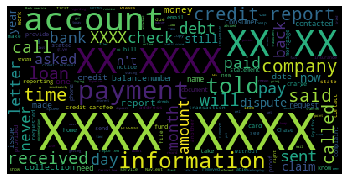

In [209]:
%matplotlib inline
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(text)

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()